**Juanmi_Global Food Waste EDA**
The FAO dataset downloadable from here: https://www.fao.org/platform-food-loss-waste/flw-data/en/ contains data 
and information from openly accessible databases, reports and studies measuring food loss and waste across food 
products, stages of the value chain, and geographical areas from 2000 to 2022 . 

**DATA FRAME 1:Consumo Alimentos estimados** df1 <br> 
Combined figures (kg/capita/year),	Household estimate (kg/capita/year),	Household estimate (tonnes/year),	Retail estimate (kg/capita/year),	Retail estimate (tonnes/year),Food service estimate (kg/capita/year),	Food service estimate (tonnes/year), M49 code

**DATA FRAME 2:** df2<BR>
['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_quantity', 'activity', 'food_supply_stage',
       'treatment', 'cause_of_loss', 'sample_size'] <br>

**Objetivos:**<br>
Analizar:<br>
* El desperdicio alimentario en hogares 
* El desperdicio por paìs por año
* Perdidas globales por año en las distintas etapas de la cadena de alimentos
* Las causas màs comunes de las pėrdidas
* Paìses con mayor y menor porcentaje de perdida alimentaria 
* Alimentos màs desperdiciados








In [2]:
import pandas as pd
import numpy as np 
from seaborn import pairplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('/Users/miguelopez/Desktop/Food_waste_EDA/foodwastedata.csv')
df2 = pd.read_csv('/Users/miguelopez/Desktop/Food_waste_EDA/fao_global_food_waste_2000_2021.csv')

In [4]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [5]:
df.tail()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
213,Zimbabwe,144,100,1458564,16,229059,28,404920,Very Low Confidence,716,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [7]:
# comprobamos si faltan valores
df.isnull().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

In [8]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


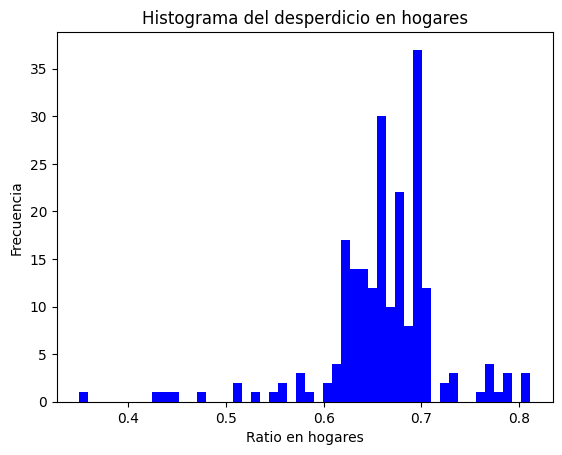

In [9]:
# creamos un histograma del desperdicio alimentario en hogares en Kg per capita per year:

household_ratio = df['Household estimate (kg/capita/year)'] / df['combined figures (kg/capita/year)']
plt.hist(household_ratio, bins=50, color='blue')
plt.xlabel('Ratio en hogares')
plt.ylabel('Frecuencia')
plt.title('Histograma del desperdicio en hogares')
plt.show()

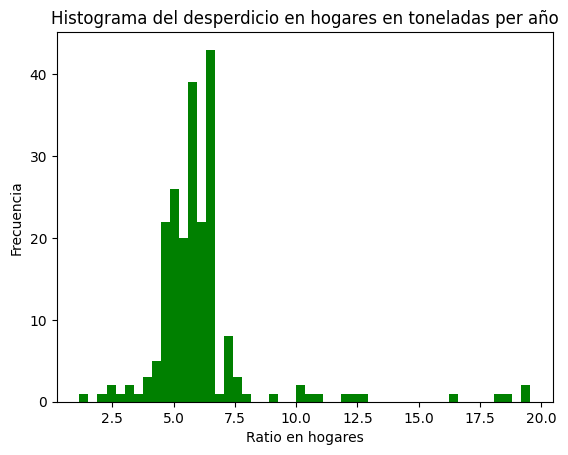

In [10]:
# creamos otro histograma del desperdicio en hogares en toneladas:
household_ratio = df['Household estimate (tonnes/year)'] / df['Retail estimate (tonnes/year)']
plt.hist(household_ratio, bins=50, color='green')
plt.xlabel('Ratio en hogares')
plt.ylabel('Frecuencia')
plt.title('Histograma del desperdicio en hogares en toneladas per año')
plt.show()

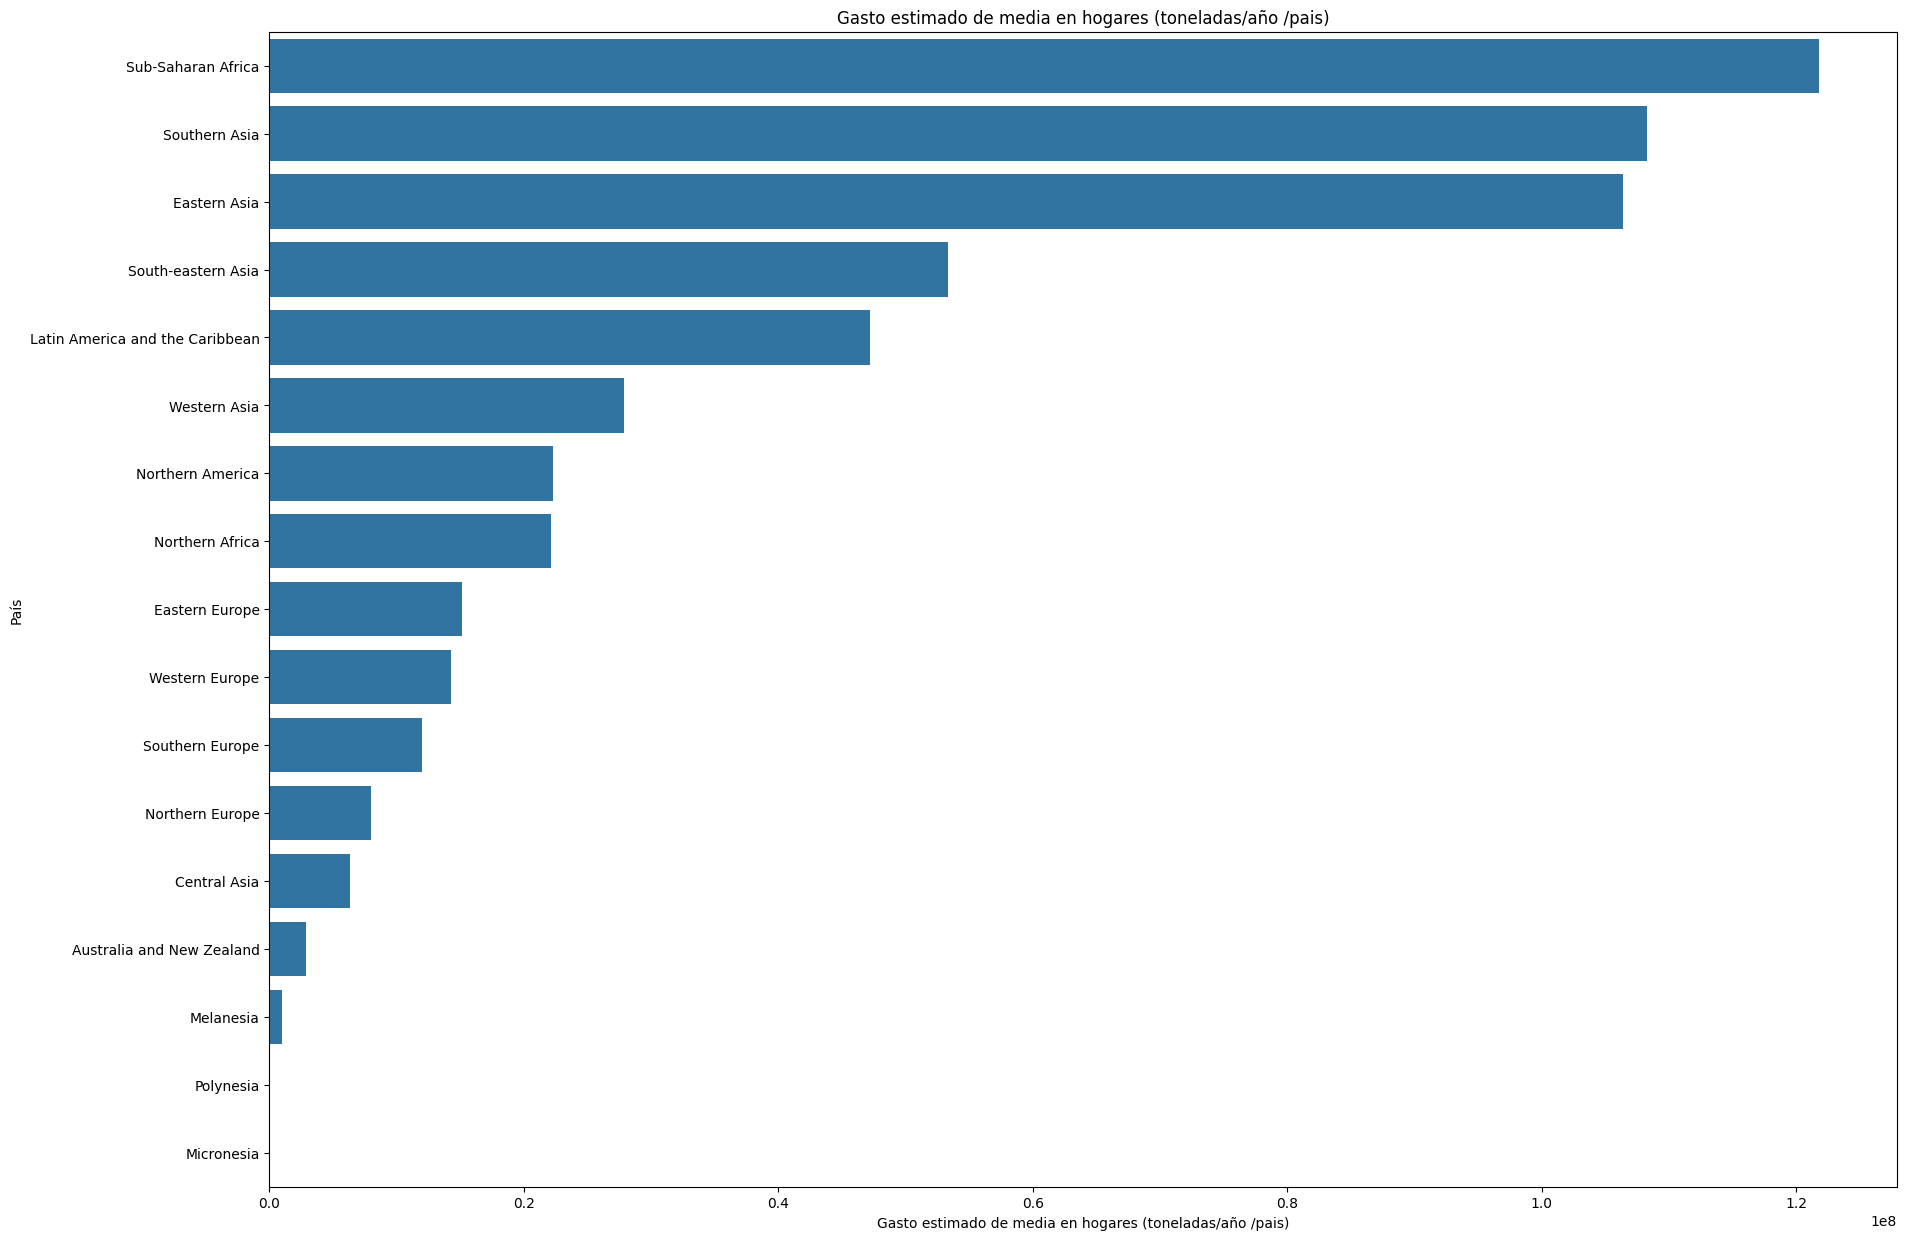

In [12]:
# grafico de barras para mostrar el gasto estimado de media en hogares:
plt.figure(figsize=(21,15))
average_wastage_household = df.groupby('Region')['Household estimate (tonnes/year)'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=average_wastage_household, y='Region', x='Household estimate (tonnes/year)')
plt.ylabel('País')
plt.xlabel('Gasto estimado de media en hogares (toneladas/año /pais)')
plt.title('Gasto estimado de media en hogares (toneladas/año /pais)')
plt.show()

In [14]:
# Mapa de calor, correlacion (corr()) entre los estimados del gasto en hogar y en tiendas en kg/capita/año:
corr_est = df[['combined figures (kg/capita/year)',
               'Household estimate (kg/capita/year)', 
               'Retail estimate (kg/capita/year)', 
               'Food service estimate (kg/capita/year)' ]].corr()
corr_est

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year)
combined figures (kg/capita/year),1.000000,0.871324,0.555106,0.460778
Household estimate (kg/capita/year),0.871324,1.000000,0.150389,0.019295
Retail estimate (kg/capita/year),0.555106,0.150389,1.000000,0.580474
Food service estimate (kg/capita/year),0.460778,0.019295,0.580474,1.000000


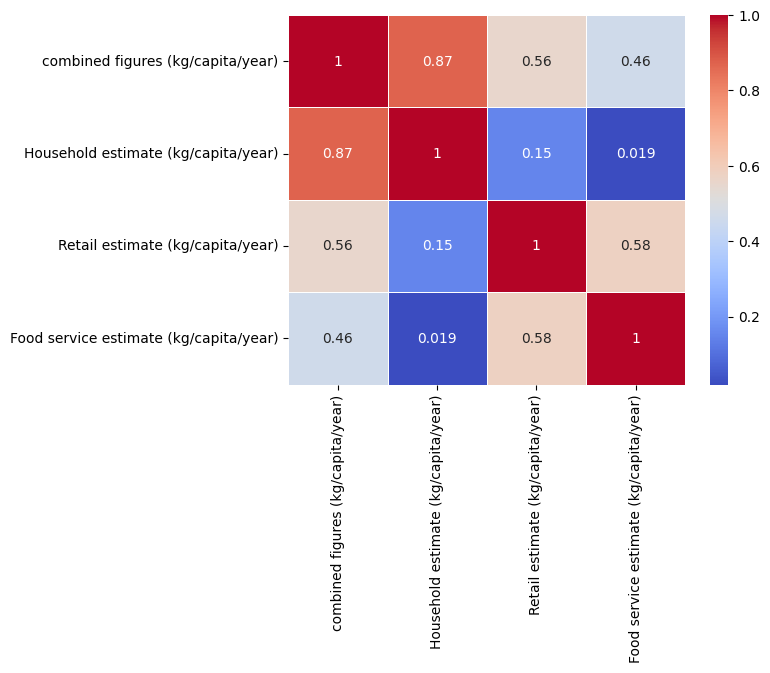

In [15]:
sns.heatmap(corr_est, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27773 entries, 0 to 27772
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  27773 non-null  int64  
 1   country                   27773 non-null  object 
 2   region                    871 non-null    object 
 3   cpc_code                  27773 non-null  object 
 4   commodity                 27773 non-null  object 
 5   year                      27773 non-null  int64  
 6   loss_percentage           27773 non-null  float64
 7   loss_percentage_original  27773 non-null  object 
 8   loss_quantity             4552 non-null   object 
 9   activity                  20873 non-null  object 
 10  food_supply_stage         27724 non-null  object 
 11  treatment                 881 non-null    object 
 12  cause_of_loss             925 non-null    object 
 13  sample_size               1176 non-null   object 
 14  method

In [18]:
# valores nulos 
df2.isnull().sum()

m49_code                        0
country                         0
region                      26902
cpc_code                        0
commodity                       0
year                            0
loss_percentage                 0
loss_percentage_original        0
loss_quantity               23221
activity                     6900
food_supply_stage              49
treatment                   26892
cause_of_loss               26848
sample_size                 26597
method_data_collection        355
reference                   19337
url                          6615
notes                       26423
dtype: int64

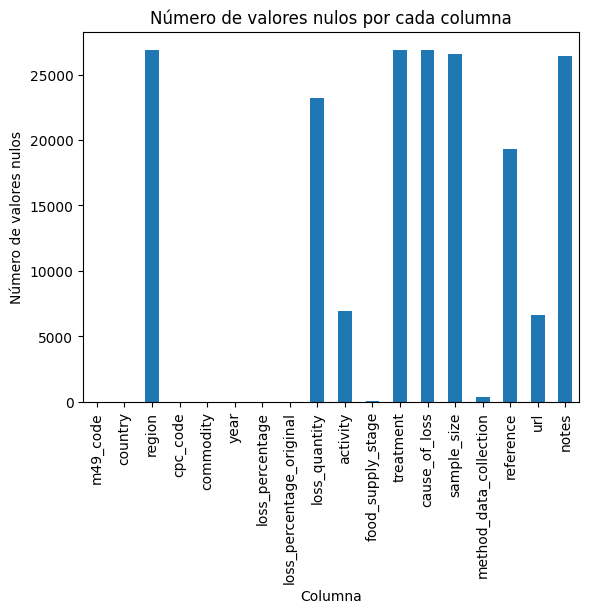

In [19]:

nulos = df2.isnull().sum()

nulos.plot(kind='bar')
plt.xlabel('Columna')
plt.ylabel('Número de valores nulos')
plt.title('Número de valores nulos por cada columna')
plt.show()


Faltan bastantes valores, loss_quantity habría sido una medida mejor, usaremos loss_percentage aunque se basa en la producción nacional de un país y puede no reflejar la cantidad real de pérdida en comparación con otro país que tenga un porcentaje similar.

In [20]:
df2.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


In [21]:
'''Como estamos buscando desperdicio alimentario,
 hay columnas que no sirven:
 "reference", "notes", "url", 
 "method_data_collection", 
 "loss_percentage_original")
'''
df2.columns

Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
       'sample_size', 'method_data_collection', 'reference', 'url', 'notes'],
      dtype='object')

In [22]:
# creamos una nueva df limpia y la llamamos df_clean:
df_clean = df2.drop(columns = ["reference", "notes", "url", "method_data_collection", "loss_percentage_original"])
df_clean


,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,68100,NaN,Whole supply chain,NaN,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,65240,NaN,Whole supply chain,NaN,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,61080,NaN,Whole supply chain,NaN,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,55270,NaN,Whole supply chain,NaN,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,51970,NaN,Whole supply chain,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,0118,Millet,2000,1.27,NaN,Storage,Farm,NaN,NaN,NaN
27769,894,Zambia,NaN,0118,Millet,2000,2.50,NaN,Winnowing,Farm,NaN,NaN,NaN
27770,894,Zambia,NaN,0118,Millet,2000,1.00,NaN,Transportation,Transport,NaN,NaN,NaN
27771,894,Zambia,NaN,0118,Millet,2000,2.38,NaN,Storage,Storage,NaN,NaN,NaN


In [24]:
#  causas de las pérdidas:
df_clean["cause_of_loss"].value_counts()

cause_of_loss
Physical Losses                                                                             87
Insect pest damage                                                                          54
main causes of this were a mismatch in supply and demand or cosmetic and quality related    41
Mechanical Damage                                                                           36
Decay                                                                                       26
                                                                                            ..
Milk rejected by the processor                                                               1
Transport 50 - 300 ltr of milk per day on motorbikes                                         1
With milk cooling system, but expensive and unreliable power supply                          1
aluminium milk containers and cooling facility                                               1
Insects, moisture and mold          

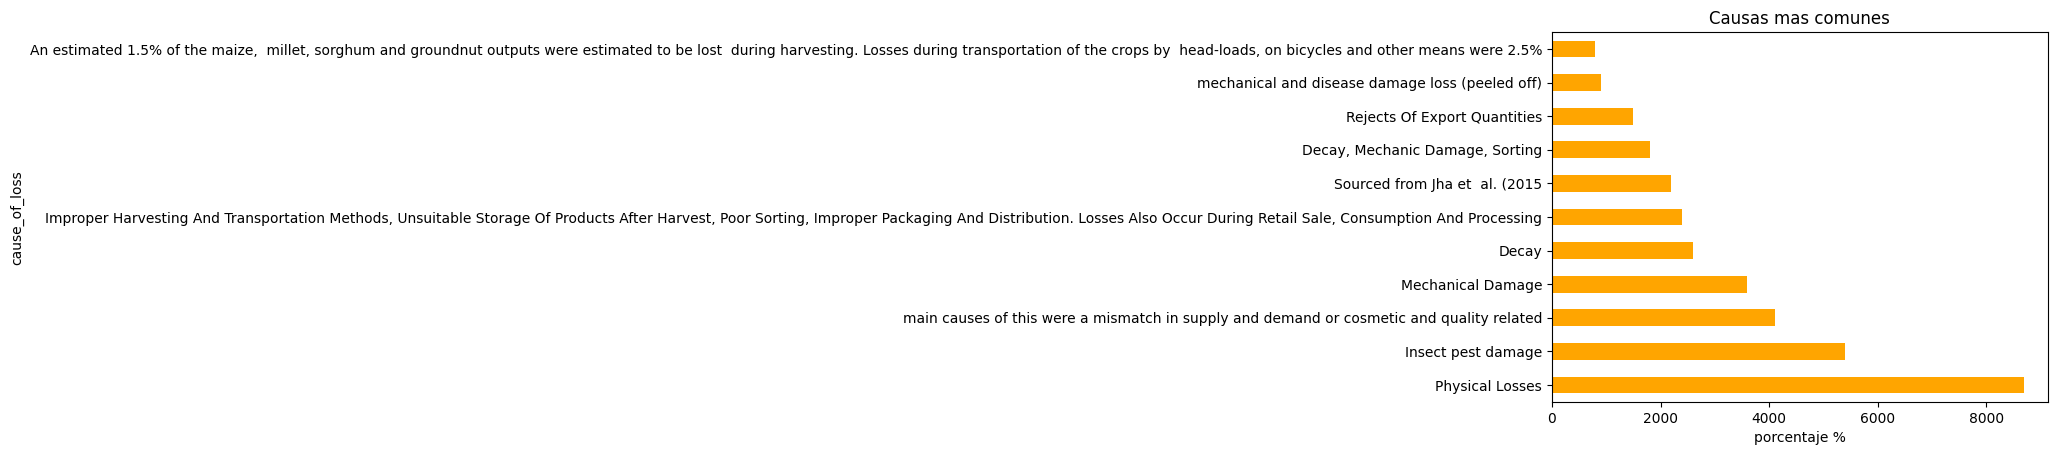

In [25]:
# Las 10 causas más comunes de la perdida de alimentos:

causas = df_clean["cause_of_loss"].value_counts(normalize=False)[:11]*100
causas.plot.barh(color='orange')
plt.xlabel("porcentaje %")
plt.title("Causas mas comunes")
plt.show()

In [26]:
# El porcentaje de media de pèrdida por paìs:
porcentaje_media = df_clean.groupby('country')['loss_percentage'].mean()

#  10 con màs pèrdida
top_10 = porcentaje_media.nlargest(10)

print(top_10)


country
Haiti                        42.500000
Australia and New Zealand    42.000000
Gabon                        35.000000
Oman                         35.000000
Africa                       30.000000
Saint Kitts and Nevis        30.000000
Italy                        25.425000
Algeria                      25.000000
Bahrain                      25.000000
Trinidad and Tobago          22.944444
Name: loss_percentage, dtype: float64


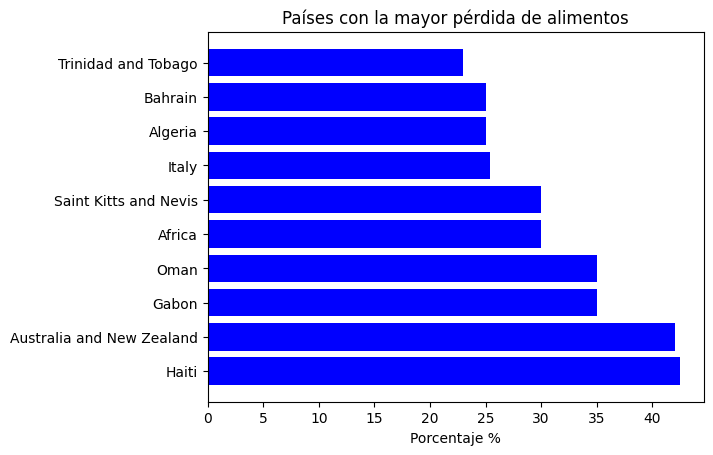

In [27]:
# Horizontal bar plot de los 10 países con la mayor media pérdida en porcentaje de alimentos:
fig, ax = plt.subplots()
ax.barh(top_10.index, top_10.values, color='blue')
ax.set_xlabel('Porcentaje %')
ax.set_title('Países con la mayor pérdida de alimentos')

plt.show()


In [28]:
# Los 10 países con la menor media de pérdida en porcentaje de alimentos:
bottom_10 = df_clean.groupby('country')['loss_percentage'].mean().nsmallest(10)
bottom_10

country
Belarus           0.021250
Spain             0.415000
Latvia            0.552222
United Kingdom    0.652745
Uzbekistan        0.724000
China,Taiwan      0.780000
Argentina         0.800000
Serbia            1.092273
Switzerland       1.110424
New Caledonia     1.133333
Name: loss_percentage, dtype: float64

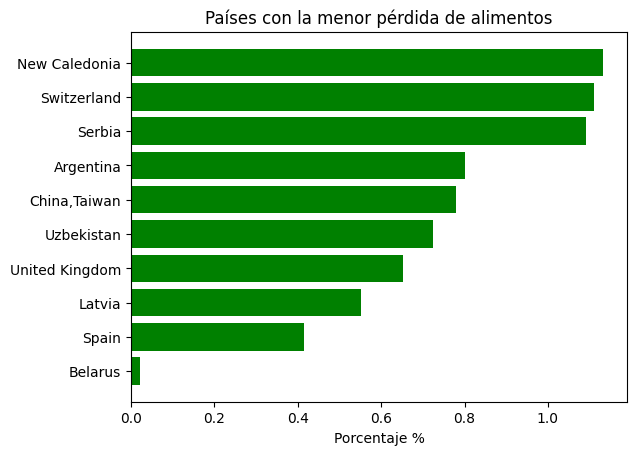

In [29]:
# Horizontal bar plot de los 10 países con la menor media de pérdida en porcentaje de alimentos:
fig, ax = plt.subplots()
ax.barh(bottom_10.index, bottom_10.values, color='green')
ax.set_xlabel('Porcentaje %')
ax.set_title('Países con la menor pérdida de alimentos')

plt.show()


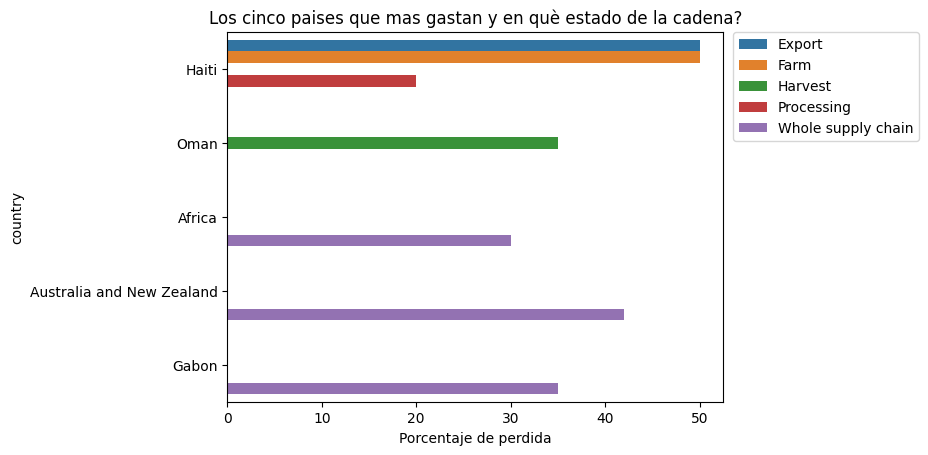

In [46]:
# los cinco paises que mas gastan y en què estado de la cadena?:

top_5 = df_clean[df_clean["country"].isin(["Haiti", "Australia and New Zealand", "Oman", "Gabon", "Africa"])]
top_group = top_5.groupby(["food_supply_stage", "country"])["loss_percentage"].mean().reset_index()

sns.barplot(data=top_group, y='country', x='loss_percentage', hue='food_supply_stage')
plt.xlabel("Porcentaje de perdida")
plt.title("Los cinco paises que mas gastan y en què estado de la cadena?")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()



In [ ]:
# Los 20 alimentos que mas se desperdician: 
top_20=df_clean['commodity'].value_counts()[:20]
top_20


commodity
Maize (corn)                       5246
Rice                               4299
Millet                             3398
Sorghum                            3390
Wheat                              2052
Fonio                               921
Barley                              824
Potatoes                            622
Tomatoes                            307
Cabbages                            238
Mangoes, guavas and mangosteens     235
Oats                                210
Hen eggs in shell, fresh            205
Cauliflowers and broccoli           155
Apples                              152
Rye                                 142
Raw milk of cattle                  139
Bananas                             131
Beans, dry                          126
Grapes                              123
Name: count, dtype: int64

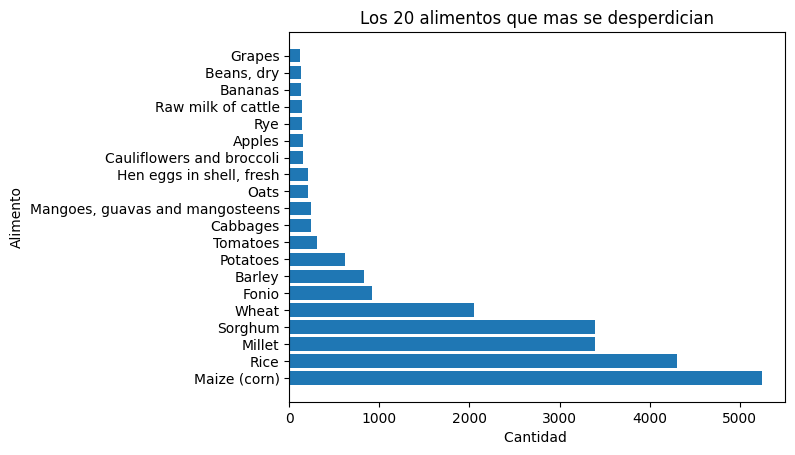

In [ ]:
plt.barh(top_10.index, top_10.values)
plt.xlabel('Cantidad ')
plt.ylabel('Alimento')
plt.title('Los 20 alimentos que mas se desperdician')
plt.show()


In [36]:
df3 = pd.read_csv('/Users/miguelopez/Desktop/Food_waste_EDA/water-withdrawals-per-kg-poore.csv')

In [49]:
df3.head(40 )

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,180.1
1,Bananas,NaN,2010,114.5
2,Barley,NaN,2010,17.1
3,Beef (beef herd),NaN,2010,1451.2
4,Beef (dairy herd),NaN,2010,2714.3
5,Beet Sugar,NaN,2010,217.7
6,Berries & Grapes,NaN,2010,419.6
7,Brassicas,NaN,2010,119.4
8,Cane Sugar,NaN,2010,620.1
9,Cassava,NaN,2010,0.0


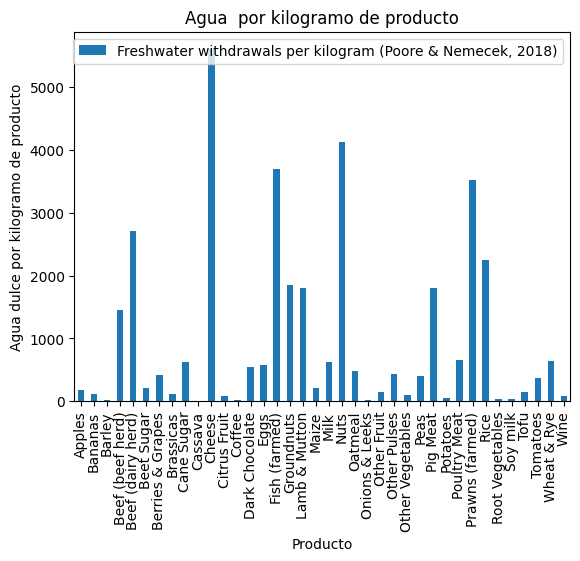

In [63]:

df3.plot.bar(x='Entity', y='Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)')


plt.xlabel('Producto')
plt.ylabel('Agua dulce por kilogramo de producto')
plt.title('Agua  por kilogramo de producto')
plt.show()